### Things to add
1) Try to create a portfolio which will try to maximize returns while trying to minimize correlation between asset classes using ML optimization
2) Create a portfolio by selecting etfs with max returns within an asset class but lowest correlation with other asset classes

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import finance as fin
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import ipywidgets as widgets
from IPython.display import display

warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

In [2]:
def reload():
    %load_ext autoreload
    %autoreload 2

In [3]:
dataset=pd.read_csv('C:/Users/arshi/Downloads/finance/data/ETFs.csv')
dataset

,Index,Symbol,Region,Asset class
0,S&P500,^GSPC,US,Equity
1,Nikkei 225,^N225,Japan,Equity
2,Russell 2000,^RUT,US,Equity
3,Euronext 100,^N100,Europe,Equity
4,Hang Seng index,^HSI,China,Equity
5,Vanguard FTSE Emerging Markets Index Fund ETF ...,VWO,Emerging Market,Equity
6,iShares MSCI India ETF,INDA,Emerging Market,Equity
7,Alpha Architect Freedom 100 Emerging Markets ETF,FRDM,Emerging Market,Equity
8,BMO MSCI Emerging Markets Index ETF,ZEM.TO,Emerging Market,Equity
9,First Trust S&P REIT Index Fund,FRI,US,Real estate


In [4]:
cols=len(dataset)
cols

52

In [5]:
symbols=fin.get_symbols(dataset)
symbols[:5]

0    ^GSPC
1    ^N225
2     ^RUT
3    ^N100
4     ^HSI
Name: Symbol, dtype: object

In [6]:
prices=fin.get_dataset(symbols)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [7]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 52 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ^GSPC    253 non-null    float64
 1   ^N225    253 non-null    float64
 2   ^RUT     253 non-null    float64
 3   ^N100    253 non-null    float64
 4   ^HSI     253 non-null    float64
 5   VWO      253 non-null    float64
 6   INDA     253 non-null    float64
 7   FRDM     253 non-null    float64
 8   ZEM.TO   253 non-null    float64
 9   FRI      253 non-null    float64
 10  NRO      253 non-null    float64
 11  2556.T   253 non-null    float64
 12  IFGL     253 non-null    float64
 13  DRW      253 non-null    float64
 14  SHY      253 non-null    float64
 15  SHYG     253 non-null    float64
 16  BLV      253 non-null    float64
 17  SUB      253 non-null    float64
 18  VGOV.L   253 non-null    float64
 19  GLTS.L   253 non-null    float64
 20  IFRB.L   253 non-null    float64
 21  ISHG     253 non

In [8]:
prices.describe()

,^GSPC,^N225,^RUT,^N100,^HSI,VWO,INDA,FRDM,ZEM.TO,FRI,...,FXE,FXB,FXA,CEW,CYB,FXC,NGPE.TO,PEX,XLPE.L,^CMC200
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,...,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,4427.936157,28068.196308,2154.052970,1292.696521,24537.215384,49.446087,45.899921,33.224221,22.578538,29.822846,...,106.159605,129.595257,72.565534,17.603004,27.295850,77.748893,39.225217,35.292767,8399.308300,1064.805975
std,191.695681,1162.951674,159.147267,50.006557,2590.987264,3.478875,2.616000,1.195687,1.660492,1.287472,...,4.321163,4.326651,1.812998,0.451187,0.774216,1.252431,3.672638,3.095907,689.293129,238.256972
min,3900.790039,24717.529297,1718.140015,1144.439941,18415.080078,40.480000,40.180000,28.820000,18.770000,26.660000,...,96.070000,117.169998,67.919998,16.620001,25.219999,75.050003,30.750000,27.680000,7056.500000,625.793030
25%,4319.939941,27241.310547,2030.770020,1265.300049,22907.250000,47.810001,44.279999,32.875000,21.660000,29.059999,...,103.500000,127.370003,71.220001,17.230000,26.799999,76.839996,36.730000,32.770000,7884.500000,890.161011
50%,4436.520020,28089.539062,2206.370117,1293.109985,24663.500000,50.080002,45.360001,33.419998,23.120001,29.670000,...,106.080002,130.429993,72.440002,17.610001,27.650000,77.580002,39.250000,36.400002,8390.000000,1016.520996
75%,4549.779785,28875.230469,2268.870117,1324.709961,26136.019531,51.730000,48.500000,33.955002,23.780001,30.950001,...,109.919998,132.679993,73.699997,17.930000,27.900000,78.360001,42.090000,37.930000,8725.500000,1219.988037
max,4796.560059,30670.099609,2442.739990,1388.089966,29468.000000,55.139999,50.779999,35.139999,24.959999,32.599998,...,114.339996,136.899994,77.160004,18.570000,28.490000,81.620003,45.799999,39.009998,9892.500000,1659.967041


In [9]:
reload()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


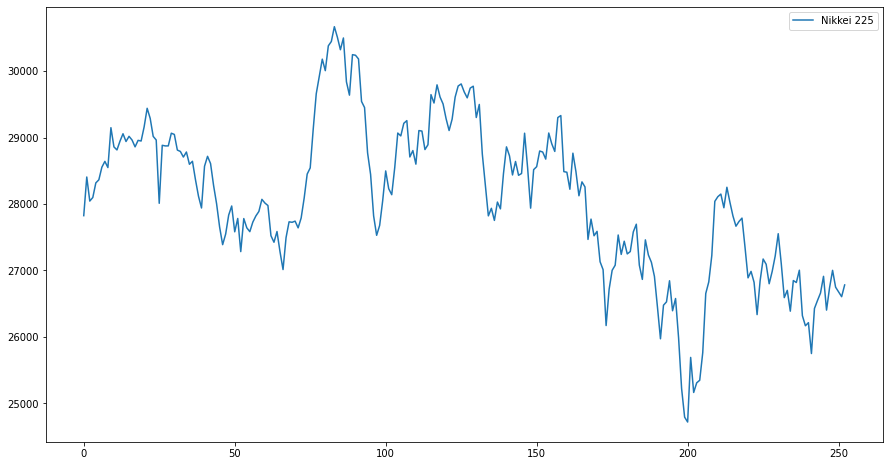

In [10]:
fin.plot_chart(prices,etfs=dataset,symbol='^N225')

In [11]:
returns=prices.pct_change()
returns

,^GSPC,^N225,^RUT,^N100,^HSI,VWO,INDA,FRDM,ZEM.TO,FRI,...,FXE,FXB,FXA,CEW,CYB,FXC,NGPE.TO,PEX,XLPE.L,^CMC200
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.000492,0.020917,0.011358,0.001310,-0.005019,0.020972,0.009033,0.013539,-0.002517,0.018228,...,0.002543,-0.002630,0.006785,0.002175,-0.003895,0.001231,0.000000,0.010756,0.008485,-0.120331
2,0.001447,-0.012757,0.001347,0.002578,0.000286,0.002363,0.007833,0.004022,0.007149,0.012531,...,-0.001049,0.001245,0.000000,0.001085,-0.001066,0.003072,0.000000,0.003374,-0.003048,0.070518
3,-0.003629,0.001918,-0.008086,-0.000684,-0.001623,-0.011244,-0.001332,-0.010272,0.002923,-0.001768,...,-0.006391,-0.004608,-0.012960,-0.002710,-0.004982,-0.006003,0.008623,-0.006725,0.001661,0.037065
4,0.008834,0.007815,0.003141,0.006972,0.017549,0.008987,0.009117,0.008384,0.018734,-0.000708,...,0.002996,0.004115,0.011292,0.007609,0.005007,0.002219,0.000000,0.002864,-0.002853,0.035245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.018555,0.009817,0.010991,0.012345,-0.011931,0.007112,0.007568,0.023135,0.000522,0.008605,...,0.012276,0.007750,0.009615,0.007063,0.009342,0.004198,0.000000,0.022694,0.016396,0.008579
249,-0.008121,-0.009384,-0.015579,-0.016638,-0.017487,-0.017891,-0.007996,-0.009236,-0.011476,0.007047,...,0.004144,-0.004796,0.000142,-0.001169,-0.004242,-0.002352,0.000000,-0.007397,-0.022461,0.006258
250,0.009451,-0.002630,0.019452,0.009698,0.002942,0.005513,-0.005374,0.002893,0.006332,0.008471,...,-0.005032,0.004071,-0.002558,-0.002926,-0.005809,-0.001048,-0.010394,0.012775,0.014692,-0.000150
251,0.019883,-0.002735,0.021721,0.015166,-0.002730,0.015018,0.008841,0.013782,0.010488,0.005113,...,0.004147,0.001407,0.000997,0.001174,-0.009739,0.003146,0.000000,0.019972,0.037329,-0.026618


In [12]:
fin.annualize_rets(returns,periods_per_year=253).sort_values()

AGQ       -0.443090
^CMC200   -0.389796
DRW       -0.281422
^HSI      -0.276159
PALL      -0.270416
PCY       -0.250545
PEX       -0.224292
VWO       -0.201188
PLTM      -0.193282
ZEM.TO    -0.185822
^RUT      -0.167948
BLV       -0.158170
IFGL      -0.144108
FXY       -0.140742
ISHG      -0.140005
FXE       -0.127926
VGOV.L    -0.117495
IGIB      -0.115744
FXB       -0.113587
CORP      -0.112491
IFRB.L    -0.096993
CYB       -0.091006
SDEU.L    -0.089603
XBTR.SW   -0.089545
JMBS      -0.076721
FXA       -0.074896
FXF       -0.071322
CEW       -0.067428
INDA      -0.065944
FRDM      -0.063619
NGPE.TO   -0.061196
SHYG      -0.058003
FXC       -0.054387
NRO       -0.046653
^N225     -0.037490
SHY       -0.032901
GLTS.L    -0.030789
BAR       -0.029070
SUB       -0.027925
2556.T    -0.023464
^N100     -0.019285
^GSPC     -0.010911
FRI        0.028071
XLPE.L     0.030066
DBA        0.206025
KRBN       0.423546
CRBA.MI    0.548488
DBC        0.559140
XOP        0.763108
GSP        0.782313


In [13]:
returns=returns.dropna()
returns.tail()

,^GSPC,^N225,^RUT,^N100,^HSI,VWO,INDA,FRDM,ZEM.TO,FRI,...,FXE,FXB,FXA,CEW,CYB,FXC,NGPE.TO,PEX,XLPE.L,^CMC200
248,0.018555,0.009817,0.010991,0.012345,-0.011931,0.007112,0.007568,0.023135,0.000522,0.008605,...,0.012276,0.007750,0.009615,0.007063,0.009342,0.004198,0.000000,0.022694,0.016396,0.008579
249,-0.008121,-0.009384,-0.015579,-0.016638,-0.017487,-0.017891,-0.007996,-0.009236,-0.011476,0.007047,...,0.004144,-0.004796,0.000142,-0.001169,-0.004242,-0.002352,0.000000,-0.007397,-0.022461,0.006258
250,0.009451,-0.002630,0.019452,0.009698,0.002942,0.005513,-0.005374,0.002893,0.006332,0.008471,...,-0.005032,0.004071,-0.002558,-0.002926,-0.005809,-0.001048,-0.010394,0.012775,0.014692,-0.000150
251,0.019883,-0.002735,0.021721,0.015166,-0.002730,0.015018,0.008841,0.013782,0.010488,0.005113,...,0.004147,0.001407,0.000997,0.001174,-0.009739,0.003146,0.000000,0.019972,0.037329,-0.026618
252,0.024742,0.006647,0.027015,0.014196,0.028890,0.010803,0.006816,0.016756,0.007265,0.024709,...,0.001914,0.002810,0.009253,0.005276,0.009835,0.004313,0.042632,0.015802,0.019845,-0.025791


In [14]:
fin.summary_stats(returns,periods=len(returns))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
^GSPC,-0.010911,0.180851,-0.438121,4.061876,0.019812,0.027445,-0.219658,-0.186753
^N225,-0.037490,0.198397,0.067275,3.167698,0.020308,0.025645,-0.330317,-0.194084
^RUT,-0.167948,0.238833,-0.002968,2.706530,0.025416,0.031016,-0.804772,-0.296634
^N100,-0.019285,0.193076,-0.102922,6.293285,0.019515,0.028860,-0.247866,-0.175529
^HSI,-0.276159,0.263563,0.703542,7.865933,0.023305,0.037101,-1.127906,-0.375082
VWO,-0.201188,0.199343,0.829215,8.558460,0.016905,0.025736,-1.126093,-0.265869
INDA,-0.065944,0.194080,-0.814368,9.176714,0.021417,0.028941,-0.480017,-0.208744
FRDM,-0.063619,0.185721,-0.053529,4.415522,0.019242,0.025749,-0.489467,-0.179852
ZEM.TO,-0.185822,0.173637,0.613037,6.453433,0.015972,0.022306,-1.206881,-0.247997
FRI,0.028071,0.186400,-0.396621,4.457697,0.020039,0.026732,-0.010057,-0.182209


In [15]:
ann_ret=fin.annualize_rets(returns,len(returns))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<AxesSubplot:xlabel='Volatility'>

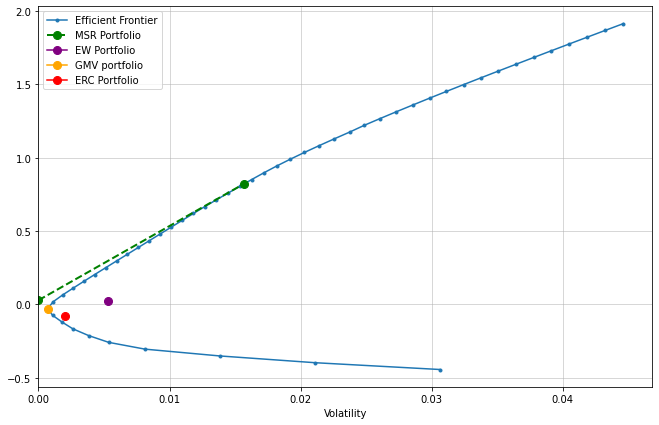

In [64]:
#need to add legend as dont know which portfolio has what weights
reload()
fin.plot_ef(len(ann_ret), ann_ret, returns.cov(), show_cml=True, riskfree_rate=0.0287,show_ew=True,show_gmv=True,show_erc=True,legend=True)

In [17]:
gmv_w=fin.gmv(fin.cc_cov(returns))
msr_w=fin.msr(0.287,ann_ret,fin.cc_cov(returns))
eq_w=pd.Series(1/len(returns),index=returns.columns)
erc_w=fin.weight_erc(returns)

In [18]:
portfolios=pd.DataFrame()
portfolios['Asset class']=dataset['Asset class']
portfolios['Index']=dataset['Index']
portfolios['msr_w']=np.round(msr_w,4)
portfolios['gmv_w']=np.round(gmv_w,4)
portfolios['eq_w']=np.repeat(1/len(returns),len(ann_ret))
portfolios['erc_w']=np.round(erc_w,4)

In [19]:
portfolios

,Asset class,Index,msr_w,gmv_w,eq_w,erc_w
0,Equity,S&P500,0.0000,0.0000,0.003968,0.0066
1,Equity,Nikkei 225,0.0000,0.0000,0.003968,0.0149
2,Equity,Russell 2000,0.0000,0.0000,0.003968,0.0053
3,Equity,Euronext 100,0.0000,0.0000,0.003968,0.0134
4,Equity,Hang Seng index,0.0000,0.0000,0.003968,0.0112
5,Equity,Vanguard FTSE Emerging Markets Index Fund ETF ...,0.0000,0.0000,0.003968,0.0059
6,Equity,iShares MSCI India ETF,0.0000,0.0000,0.003968,0.0080
7,Equity,Alpha Architect Freedom 100 Emerging Markets ETF,0.0000,0.0000,0.003968,0.0054
8,Equity,BMO MSCI Emerging Markets Index ETF,0.0000,0.0000,0.003968,0.0136
9,Real estate,First Trust S&P REIT Index Fund,0.0000,0.0000,0.003968,0.0071


In [20]:
pf_w=['Max Sharpe Ratio Portfolio','Global Minimum Variance Portfolio','Equally Weighted Portfolio','Equal Risk Contribution Portfolio']

In [21]:
gmv_ret=fin.portfolio_return(gmv_w,ann_ret)*100
msr_ret=fin.portfolio_return(msr_w,ann_ret)*100
eq_ret=fin.portfolio_return(eq_w,ann_ret)*100
erc_ret=fin.portfolio_return(erc_w,ann_ret)*100
pf_returns=[msr_ret,gmv_ret,eq_ret,erc_ret]

In [22]:
gmv_vol=fin.portfolio_vol(gmv_w,fin.cc_cov(returns))*100
msr_vol=fin.portfolio_vol(msr_w,fin.cc_cov(returns))*100
eq_vol=fin.portfolio_vol(eq_w,fin.cc_cov(returns))*100
erc_vol=fin.portfolio_vol(erc_w,fin.cc_cov(returns))*100
pf_vol=[msr_vol,gmv_vol,eq_vol,erc_vol]

In [23]:
pf_values=pd.DataFrame()
pf_values['Weighting Schemes']=pf_w
pf_values['Returns (%)']=pf_returns
pf_values['Volatility (%)']=pf_vol

In [24]:
pf_values

,Weighting Schemes,Returns (%),Volatility (%)
0,Max Sharpe Ratio Portfolio,106.663952,1.571312
1,Global Minimum Variance Portfolio,-3.176770,0.070442
2,Equally Weighted Portfolio,0.437891,0.103122
3,Equal Risk Contribution Portfolio,-4.829077,0.250226


In [25]:
print('Below is the composition for Max Sharpe Ratio Portfolio-\n')
msr_pf=dataset.iloc[np.nonzero(np.round(msr_w,4))]
msr_pf['Weightage (%)']=np.round(msr_w[np.nonzero(np.round(msr_w,4))],4)*100
msr_pf

Below is the composition for Max Sharpe Ratio Portfolio-



,Index,Symbol,Region,Asset class,Weightage (%)
28,iPath S&P GSCI Total Return Index ETN,GSP,NaN,Commodities,18.63
29,Lyxor Bloomberg Equal-weight Commodity ex-Agri...,CRBA.MI,NaN,Commodities,6.44
30,Invesco DB Commodity Index Tracking Fund,DBC,NaN,Commodities,14.86
37,"United States Gasoline Fund, LP",UGA,NaN,Commodities,31.49
38,SPDR S&P Oil & Gas Exploration & Production ETF,XOP,NaN,Commodities,8.51
39,ProShares Ultra Bloomberg Crude Oil,UCO,NaN,Commodities,20.07


In [26]:
np.round(returns[msr_pf['Symbol']].corr(),3)

,GSP,CRBA.MI,DBC,UGA,XOP,UCO
GSP,1.000,0.288,0.963,0.884,0.592,0.931
CRBA.MI,0.288,1.000,0.249,0.244,0.137,0.215
DBC,0.963,0.249,1.000,0.909,0.639,0.951
UGA,0.884,0.244,0.909,1.000,0.576,0.926
XOP,0.592,0.137,0.639,0.576,1.000,0.632
UCO,0.931,0.215,0.951,0.926,0.632,1.000


In [27]:
print('Below is the composition for Global Minimum Variance Portfolio-\n')
gmv_pf=dataset.iloc[np.nonzero(np.round(gmv_w,4))]
gmv_pf['Weightage (%)']=np.round(gmv_w[np.nonzero(np.round(gmv_w,4))],4)*100
gmv_pf

Below is the composition for Global Minimum Variance Portfolio-



,Index,Symbol,Region,Asset class,Weightage (%)
14,iShares 1-3 Year Treasury Bond ETF,SHY,US,Fixed Income,45.21
15,iShares 0-5 Year High Yield Corporate Bond ETF,SHYG,US,Fixed Income,0.18
17,iShares Short-Term National Muni Bond ETF,SUB,US,Fixed Income,42.27
19,SSgA SPDR ETFs Europe I Public Limited Company...,GLTS.L,Europe,Fixed Income,9.80
27,Janus Henderson Mortgage-Backed Securities ETF,JMBS,US,MBS,2.55


In [28]:
np.round(returns[gmv_pf['Symbol']].corr(),3)

,SHY,SHYG,SUB,GLTS.L,JMBS
SHY,1.000,0.278,0.454,-0.016,0.740
SHYG,0.278,1.000,0.391,-0.042,0.380
SUB,0.454,0.391,1.000,-0.027,0.485
GLTS.L,-0.016,-0.042,-0.027,1.000,0.049
JMBS,0.740,0.380,0.485,0.049,1.000


In [29]:
print('Below is the composition for Equal Risk Contribution Portfolio-\n')
erc_pf=dataset.iloc[np.nonzero(np.round(erc_w,4))]
erc_pf['Weightage (%)']=np.round(erc_w[np.nonzero(np.round(erc_w,4))],4)*100
erc_pf

Below is the composition for Equal Risk Contribution Portfolio-



,Index,Symbol,Region,Asset class,Weightage (%)
0,S&P500,^GSPC,US,Equity,0.66
1,Nikkei 225,^N225,Japan,Equity,1.49
2,Russell 2000,^RUT,US,Equity,0.53
3,Euronext 100,^N100,Europe,Equity,1.34
4,Hang Seng index,^HSI,China,Equity,1.12
5,Vanguard FTSE Emerging Markets Index Fund ETF ...,VWO,Emerging Market,Equity,0.59
6,iShares MSCI India ETF,INDA,Emerging Market,Equity,0.80
7,Alpha Architect Freedom 100 Emerging Markets ETF,FRDM,Emerging Market,Equity,0.54
8,BMO MSCI Emerging Markets Index ETF,ZEM.TO,Emerging Market,Equity,1.36
9,First Trust S&P REIT Index Fund,FRI,US,Real estate,0.71


In [30]:
print('Below is the composition for Equally Weighted Portfolio-\n')
eq_pf=dataset.copy()
eq_pf['Weightage (%)']=eq_w.values*100
eq_pf

Below is the composition for Equally Weighted Portfolio-



,Index,Symbol,Region,Asset class,Weightage (%)
0,S&P500,^GSPC,US,Equity,0.396825
1,Nikkei 225,^N225,Japan,Equity,0.396825
2,Russell 2000,^RUT,US,Equity,0.396825
3,Euronext 100,^N100,Europe,Equity,0.396825
4,Hang Seng index,^HSI,China,Equity,0.396825
5,Vanguard FTSE Emerging Markets Index Fund ETF ...,VWO,Emerging Market,Equity,0.396825
6,iShares MSCI India ETF,INDA,Emerging Market,Equity,0.396825
7,Alpha Architect Freedom 100 Emerging Markets ETF,FRDM,Emerging Market,Equity,0.396825
8,BMO MSCI Emerging Markets Index ETF,ZEM.TO,Emerging Market,Equity,0.396825
9,First Trust S&P REIT Index Fund,FRI,US,Real estate,0.396825


In [31]:
gmv_pf_price=np.sum(np.round(gmv_w[np.nonzero(np.round(gmv_w,4))],4)*prices[gmv_pf['Symbol']],axis=1)
msr_pf_price=np.sum(np.round(msr_w[np.nonzero(np.round(msr_w,4))],4)*prices[msr_pf['Symbol']],axis=1)
erc_pf_price=np.sum(np.round(erc_w[np.nonzero(np.round(erc_w,4))],4)*prices[erc_pf['Symbol']],axis=1)
eq_pf_price=np.sum(np.round(eq_w,4)*prices[eq_pf['Symbol']],axis=1)

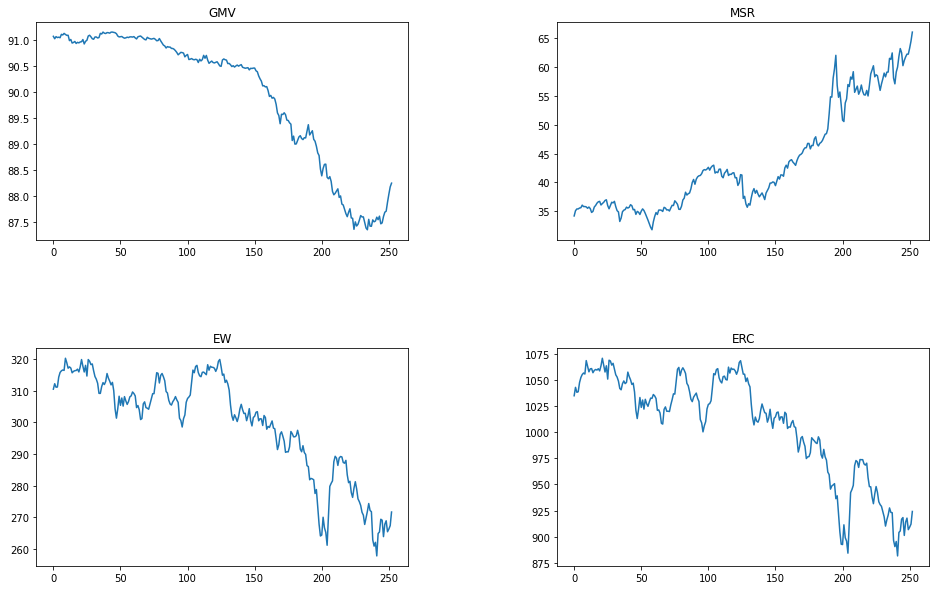

In [60]:
fig, axes = plt.subplots(nrows=2, ncols=2)

plt.subplots_adjust(wspace=0.4, hspace=0.5)

pf_prices['GMV'].plot(ax=axes[0, 0],figsize=(16,10));

axes[0, 0].set_title("GMV");

pf_prices['MSR'].plot(ax=axes[0, 1]);

axes[0, 1].set_title("MSR");

pf_prices['EW'].plot(ax=axes[1, 0]);

axes[1, 0].set_title("EW");

pf_prices['ERC'].plot(ax=axes[1, 1]);

axes[1, 1].set_title("ERC");

In [38]:
pf_prices=pd.DataFrame()
pf_prices['GMV']=gmv_pf_price
pf_prices['MSR']=msr_pf_price
pf_prices['EW']=eq_pf_price
pf_prices['ERC']=erc_pf_price
pf_prices

,GMV,MSR,EW,ERC
0,91.071783,34.216624,310.471205,1035.109658
1,91.025217,35.119525,312.188444,1043.157057
2,91.065825,35.425627,311.078123,1038.426918
3,91.047504,35.430960,311.148736,1038.895305
4,91.055407,35.587741,314.273082,1047.685545
...,...,...,...,...
248,87.713011,62.171069,268.925746,917.742840
249,87.884701,62.174305,265.461906,906.657682
250,88.038426,63.215442,266.306666,909.087709
251,88.179239,64.427507,267.397116,911.983918


In [39]:
fin.summary_stats(pf_prices.pct_change().dropna(),periods=253)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
GMV,-0.031090,0.012595,-0.637204,5.742348,0.001518,0.002224,-4.709517,-0.041653
MSR,0.933442,0.332227,-0.823310,6.409331,0.034638,0.050159,2.640529,-0.184594
EW,-0.125377,0.136879,0.438401,5.416460,0.013099,0.017942,-1.102204,-0.194850
ERC,-0.107627,0.128949,0.413543,5.131103,0.012401,0.017054,-1.036334,-0.177021


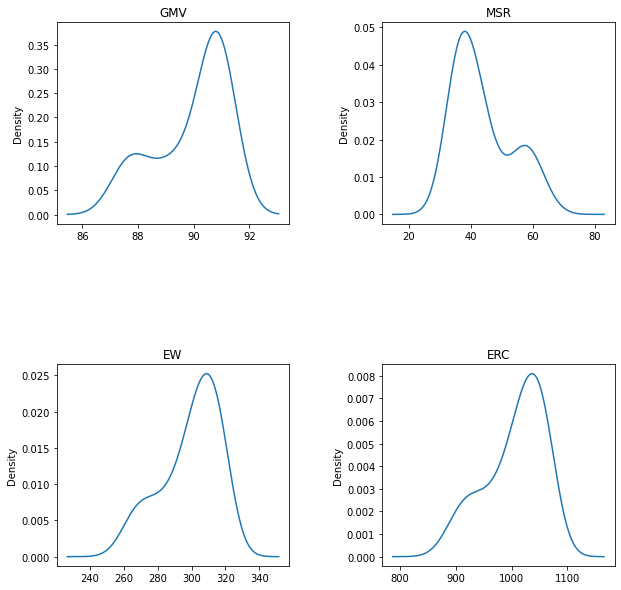

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=2)

plt.subplots_adjust(wspace=0.4, hspace=0.7)

pf_prices['GMV'].plot.kde(ax=axes[0, 0],figsize=(10,10),bw_method=0.5);

axes[0, 0].set_title("GMV");

pf_prices['MSR'].plot.kde(ax=axes[0, 1],bw_method=0.5);

axes[0, 1].set_title("MSR");

pf_prices['EW'].plot.kde(ax=axes[1, 0],bw_method=0.5);

axes[1, 0].set_title("EW");

pf_prices['ERC'].plot.kde(ax=axes[1, 1],bw_method=0.5);

axes[1, 1].set_title("ERC");

In [35]:
cppi_controls = widgets.interactive(fin.show_cppi,
                                   n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50), 
                                   mu=(-0.4, +.4, .01),
                                   sigma=(0, .3, .005),
                                   floor=(0, 2, .1),
                                   m=(1, 5, .5),
                                   riskfree_rate=(0, .05, .001),
                                   steps_per_year=widgets.IntSlider(min=1, max=12, step=1, value=12,
                                                          description="Rebals/Year"),
                                   y_max=widgets.IntSlider(min=0, max=100, step=1, value=100,
                                                          description="Zoom Y Axis")
)
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…